<a href="https://colab.research.google.com/github/Hairul008/Hairul_F55122008_PCD-QUIZ-/blob/main/PCD(Quiz_Hairul_F55122008).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import random

In [104]:
# 1. Baca gambar menggunakan OpenCV dan PIL
def read_image(file_path):
    image_opencv = cv2.imread(file_path)
    image_pil = Image.open(file_path)
    return image_opencv, image_pil

In [105]:
# 2. Edge detection menggunakan Sobel dan Canny
def edge_detection_sobel(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = np.uint8(sobel_combined)
    return sobel_combined

In [106]:
def edge_detection_canny(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_edges = cv2.Canny(gray_image, 100, 200)
    return canny_edges

In [107]:
# 3. Cropping: Random cropping dan half-size center cropping
def random_crop(image, crop_size):
    height, width = image.shape[:2]
    x = random.randint(0, width - crop_size)
    y = random.randint(0, height - crop_size)
    cropped_image = image[y:y+crop_size, x:x+crop_size]
    return cropped_image

In [108]:

def center_crop_half_size(image):
    height, width = image.shape[:2]
    new_height, new_width = height // 2, width // 2
    start_x = (width - new_width) // 2
    start_y = (height - new_height) // 2
    cropped_image = image[start_y:start_y+new_height, start_x:start_x+new_width]
    return cropped_image

In [109]:
# 4. Transformasi warna: putih menjadi hitam, hitam jadi putih
def invert_colors(image):
    inverted_image = cv2.bitwise_not(image)
    return inverted_image

In [110]:
# 5. Tambahkan noise pada gambar: salt and pepper noise dan gaussian
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt = np.random.rand(*image.shape) < salt_prob
    pepper = np.random.rand(*image.shape) < pepper_prob
    noisy_image[salt] = 255
    noisy_image[pepper] = 0
    return noisy_image

In [111]:
def add_gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    gaussian = np.random.normal(mean, std, image.shape)
    noisy_image = cv2.add(image, gaussian.astype(np.uint8))
    return noisy_image

In [112]:
# 6. Transformasi geometri: rotasi, flip vertikal, dan flip horizontal
def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

In [113]:
def flip_vertical(image):
    flipped_image = cv2.flip(image, 0)
    return flipped_image

In [114]:
def flip_horizontal(image):
    flipped_image = cv2.flip(image, 1)
    return flipped_image

In [115]:
# Mengunggah gambar
from google.colab import files
uploaded = files.upload()

Saving DN Motor.jpg to DN Motor (1).jpg


In [116]:
# Membaca gambar yang diunggah
file_name = next(iter(uploaded))
image_opencv, image_pil = read_image('/content/DN Motor.jpg')

Gambar asli:


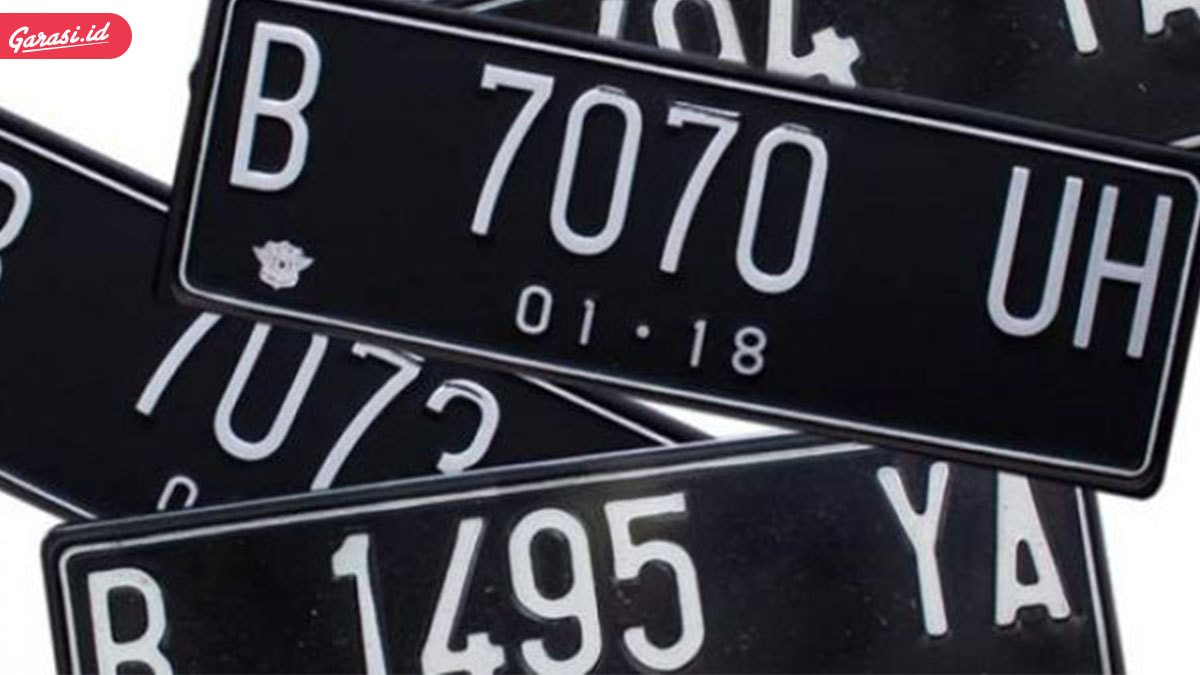

In [117]:
# Menampilkan gambar asli
print("Gambar asli:")
cv2_imshow(image_opencv)


Deteksi tepi menggunakan Sobel:


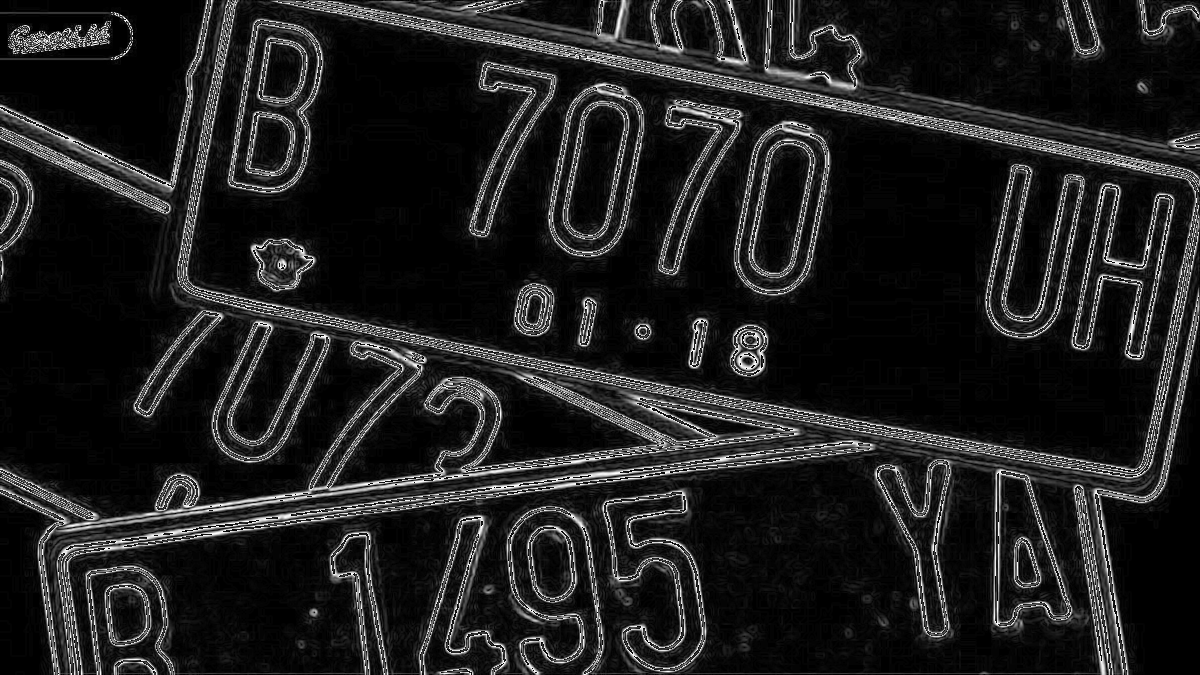

In [118]:
# 2. Edge detection
sobel_edges = edge_detection_sobel(image_opencv)
print("\nDeteksi tepi menggunakan Sobel:")
cv2_imshow(sobel_edges)


Deteksi tepi menggunakan Canny:


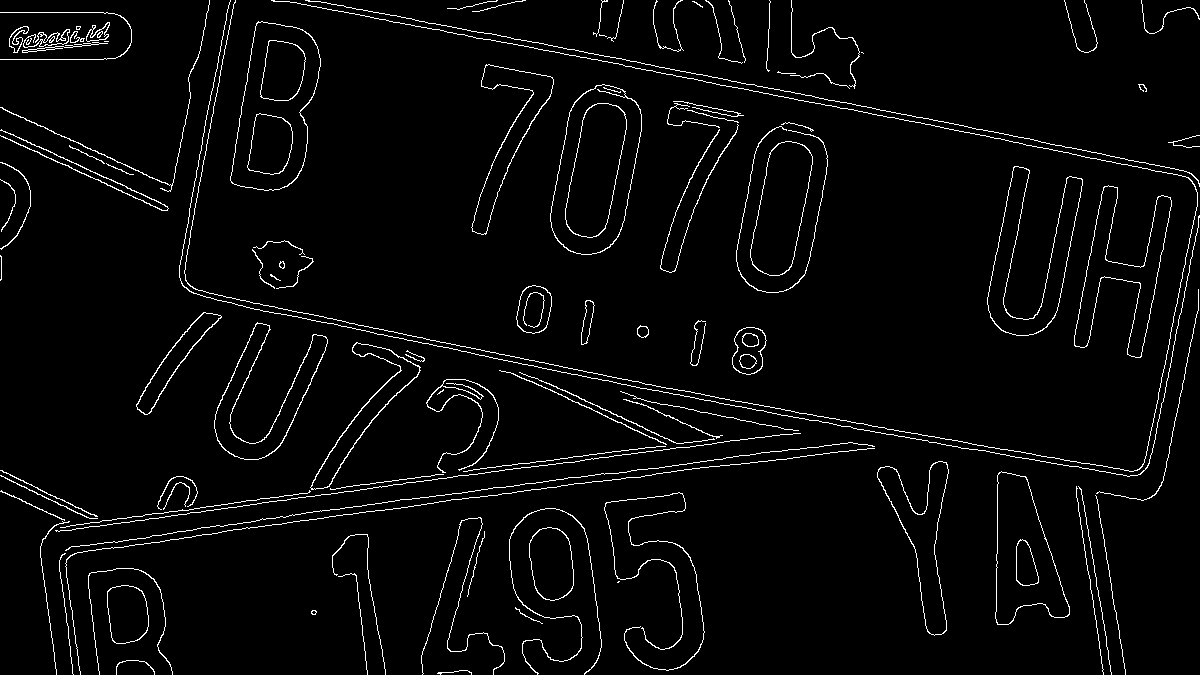

In [119]:
canny_edges = edge_detection_canny(image_opencv)
print("\nDeteksi tepi menggunakan Canny:")
cv2_imshow(canny_edges)


Hasil random cropping:


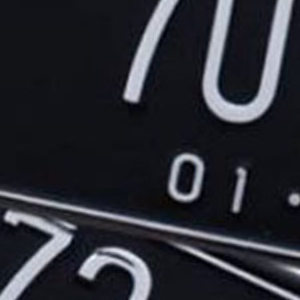

In [120]:
# 3. Cropping
random_cropped_image = random_crop(image_opencv, 300)
print("\nHasil random cropping:")
cv2_imshow(random_cropped_image)


Hasil half-size center cropping:


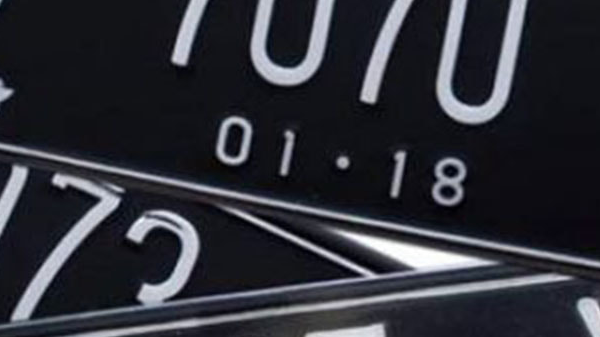

In [121]:
center_cropped_image = center_crop_half_size(image_opencv)
print("\nHasil half-size center cropping:")
cv2_imshow(center_cropped_image)


Gambar dengan warna terbalik:


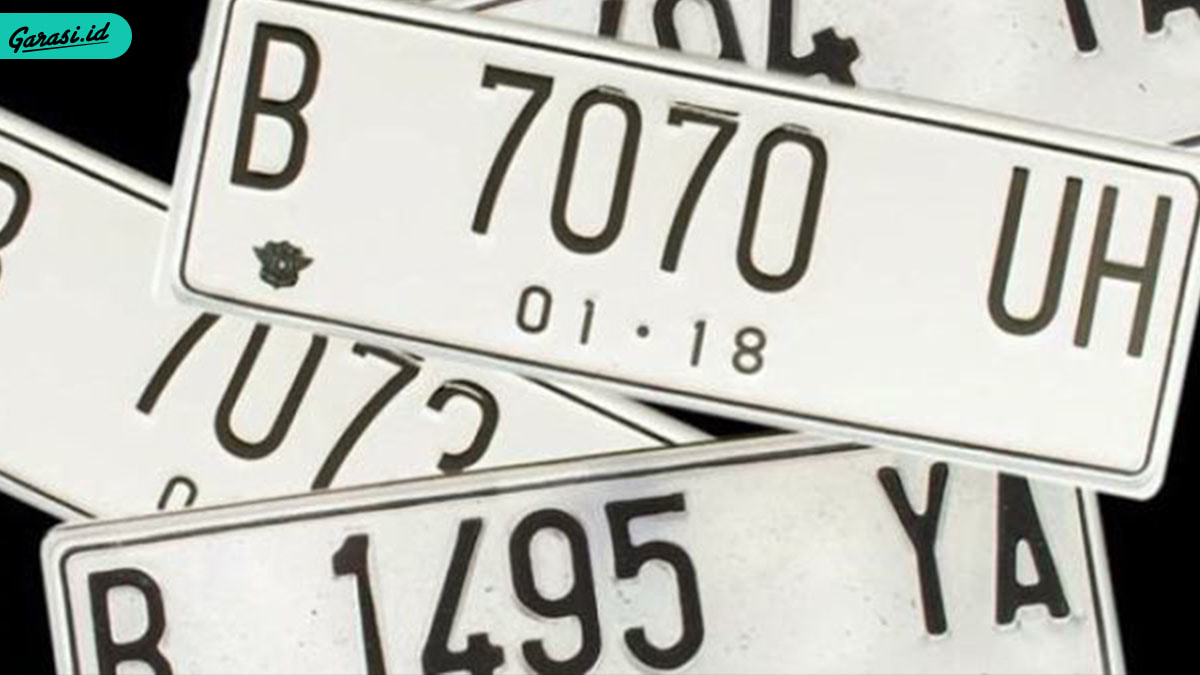

In [122]:
# 4. Transformasi warna
inverted_image = invert_colors(image_opencv)
print("\nGambar dengan warna terbalik:")
cv2_imshow(inverted_image)


Gambar dengan noise salt and pepper:


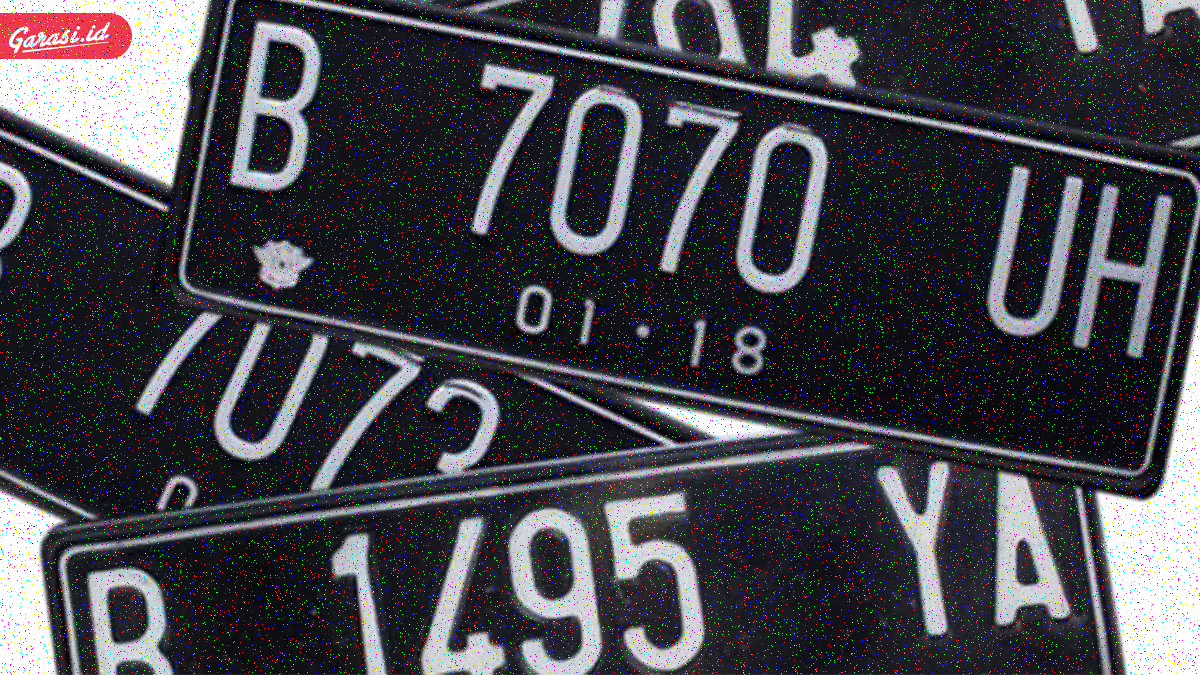

In [123]:
# 5. Tambahkan noise
noisy_image_salt_pepper = add_salt_pepper_noise(image_opencv, 0.02, 0.02)
print("\nGambar dengan noise salt and pepper:")
cv2_imshow(noisy_image_salt_pepper)


Gambar dengan noise Gaussian:


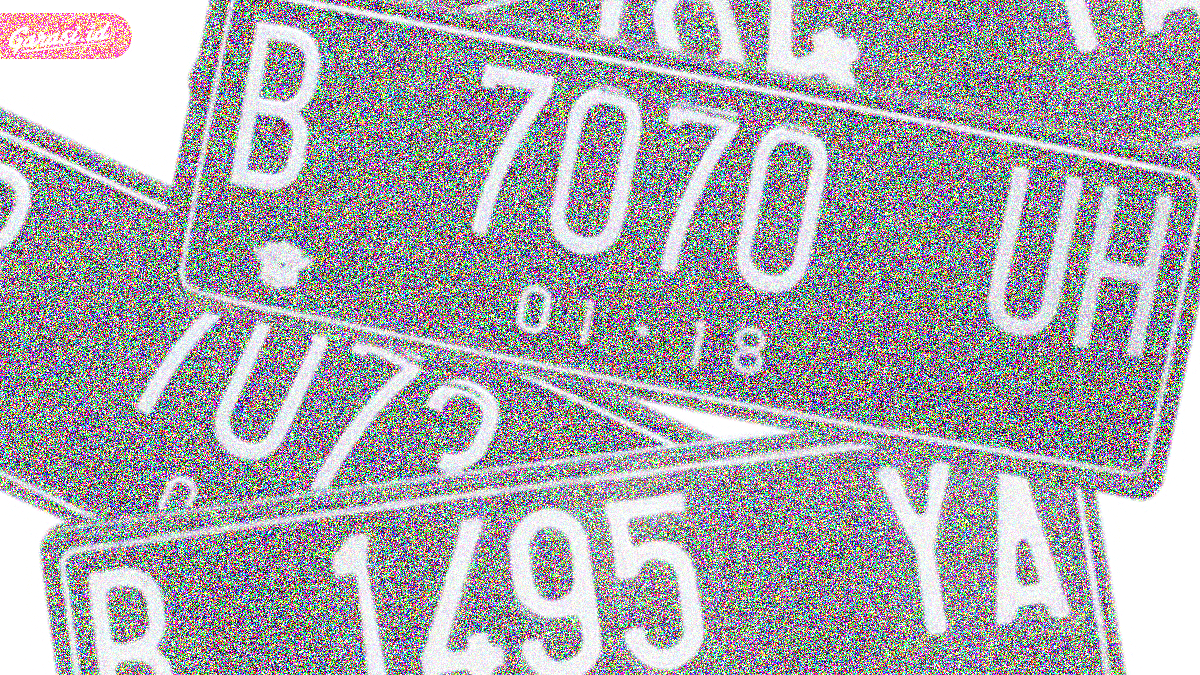

In [124]:
noisy_image_gaussian = add_gaussian_noise(image_opencv)
print("\nGambar dengan noise Gaussian:")
cv2_imshow(noisy_image_gaussian)



Gambar setelah rotasi 45 derajat:


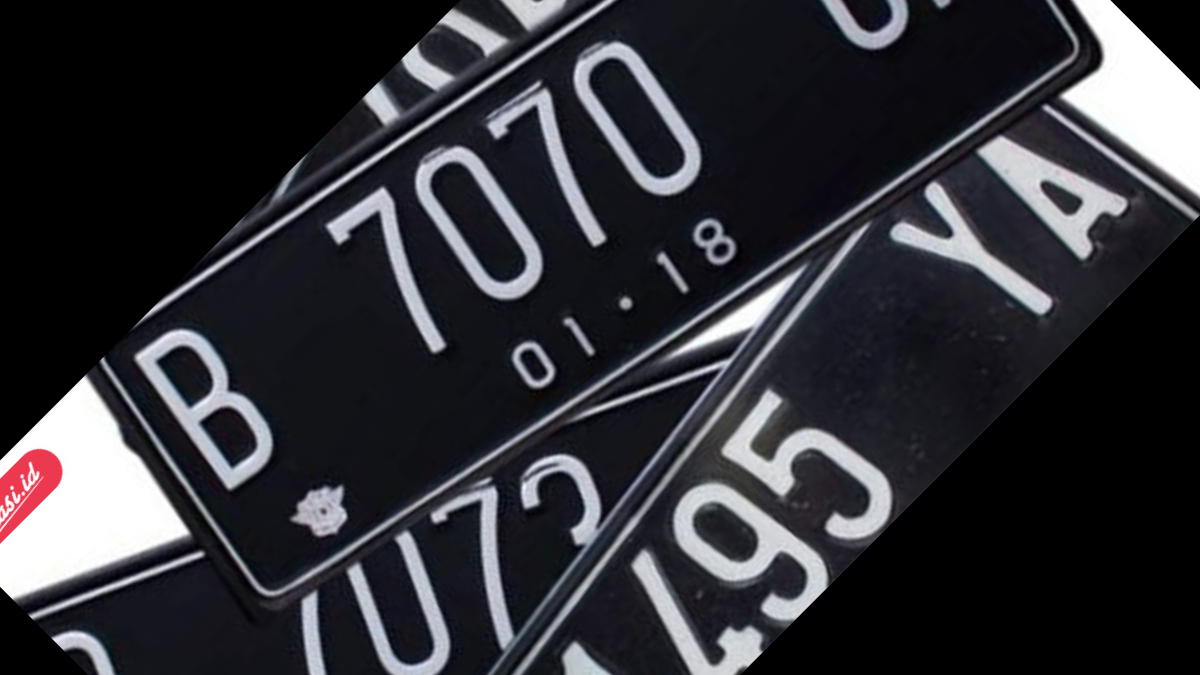

In [125]:
# 6. Transformasi geometri
rotated_image = rotate_image(image_opencv, 45)
print("\nGambar setelah rotasi 45 derajat:")
cv2_imshow(rotated_image)


Gambar setelah flip vertikal:


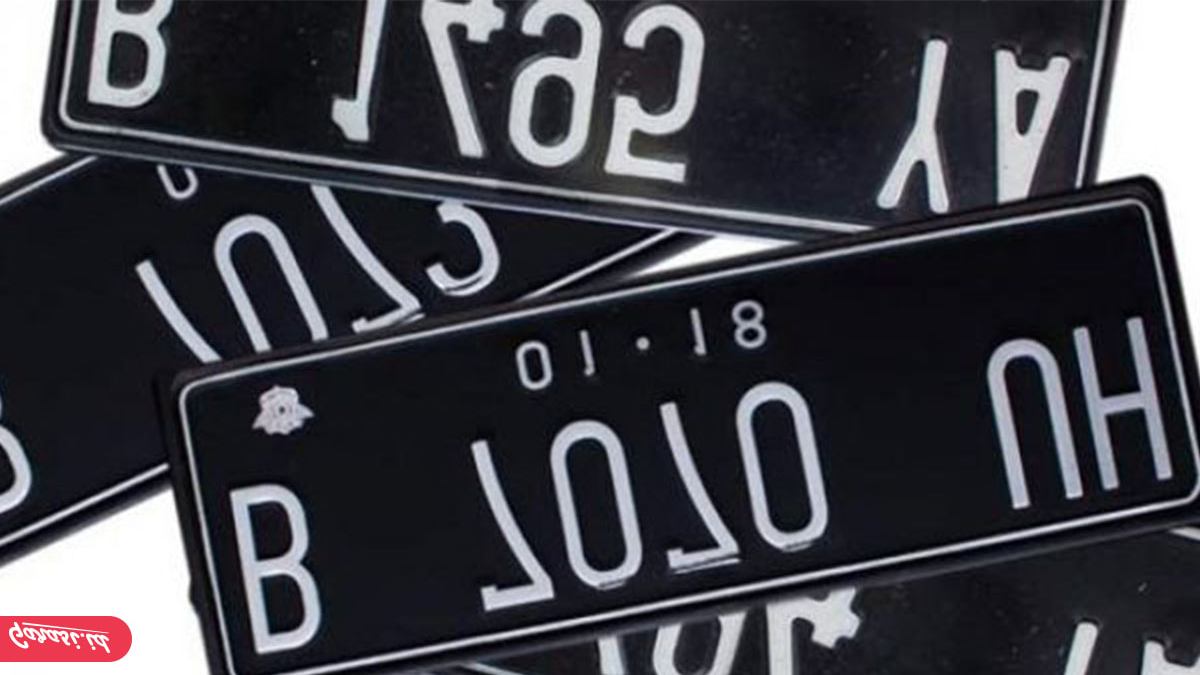

In [126]:
flipped_vertical_image = flip_vertical(image_opencv)
print("\nGambar setelah flip vertikal:")
cv2_imshow(flipped_vertical_image)


Gambar setelah flip horizontal:


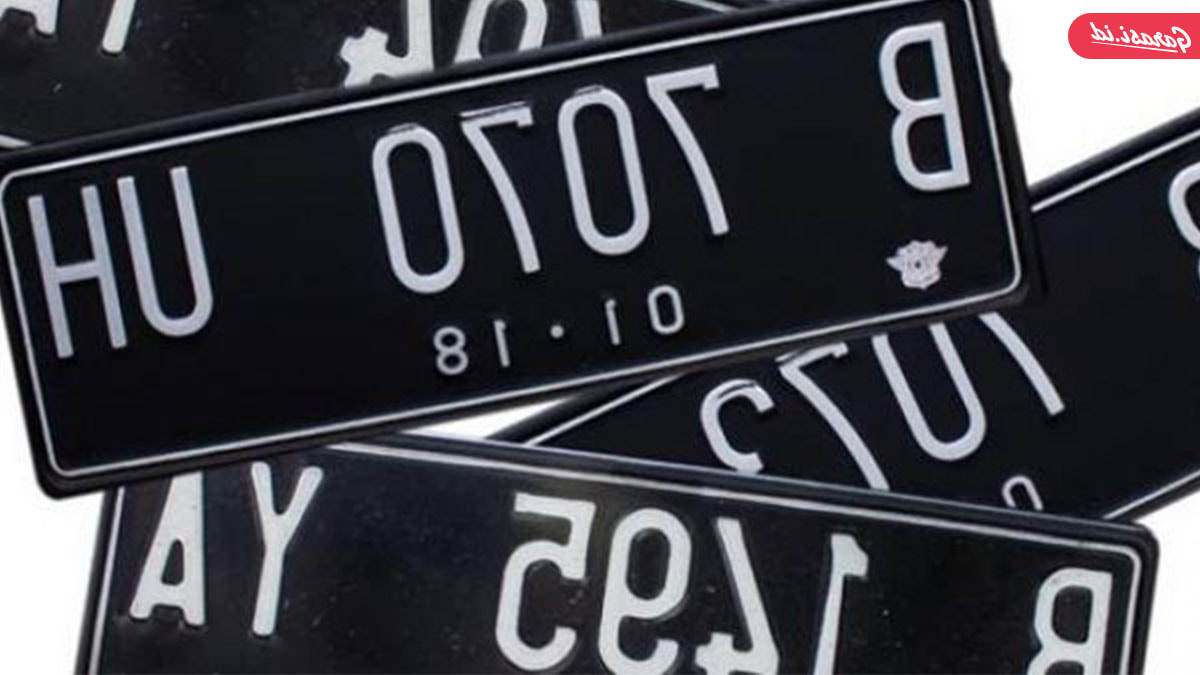

In [127]:
flipped_horizontal_image = flip_horizontal(image_opencv)
print("\nGambar setelah flip horizontal:")
cv2_imshow(flipped_horizontal_image)